# Main Command
1. sub['H1GH2'] = sub['H1GH2'].replace((6,8), np.nan)
2. sub.loc[(sub['S2AQ3'] != 9) & (data['S2AQ8A'].isnull()), 'S2AQ8A'] = 11
3. <br>
record1 = {1:6, 2:5, 3:4, 4:3, 5:2, 6:1}<br>
sub['USFREQ'] = sub['S3AQ381'].map(record1)<br>
4. sub['SKIP'] = sub['H1ED1'] + sub['H1ED2']
5. sub1 = sub[['AID', 'H1ED1', 'H1ED2', 'SKIP']]
6. 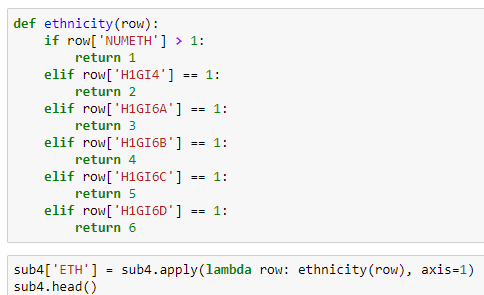
7. data['TEST1'] = pd.cut(data.H1GI3, [5, 10, 14, 19])
8. data['TEST'] = pd.qcut(data.H1GI3, 4, labels=['25%', '50%', '75%', '100%'])

# Import data

In [66]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/addhealth.csv", low_memory=False)

In [67]:
# select the attribute we will use
sub1 = data[['AID', 'H1GH2', 'H1DA1', 'H1DA2', 'H1DA4', 'H1DA5', 'H1DA6', 'H1DA7', 'H1ED1', 'H1ED2']]
sub = sub1.copy()

In [68]:
sub['H1ED1'] = pd.to_numeric(sub['H1ED1'], errors='coerce')
sub['H1ED2'] = pd.to_numeric(sub['H1ED2'], errors='coerce')

data['H1GI4'] = pd.to_numeric(data['H1GI4'], errors='coerce')
data['H1GI6A'] = pd.to_numeric(data['H1GI6A'], errors='coerce')
data['H1GI6B'] = pd.to_numeric(data['H1GI6B'], errors='coerce')
data['H1GI6C'] = pd.to_numeric(data['H1GI6C'], errors='coerce')
data['H1GI6D'] = pd.to_numeric(data['H1GI6D'], errors='coerce')
data['H1GI3'] = pd.to_numeric(data['H1GI3'], errors='coerce')

In [34]:
# replace useless values to NAN
sub['H1GH2'] = sub['H1GH2'].replace((6,8), np.nan)
sub['H1DA1'] = sub['H1DA1'].replace((6,8), np.nan)
sub['H1DA2'] = sub['H1DA2'].replace((6,8), np.nan)
sub['H1DA4'] = sub['H1DA4'].replace((6,8), np.nan)
sub['H1DA5'] = sub['H1DA5'].replace((6,8), np.nan)
sub['H1DA6'] = sub['H1DA6'].replace((6,8), np.nan)
sub['H1DA7'] = sub['H1DA7'].replace((6,8), np.nan)
sub['H1ED1'] = sub['H1ED1'].replace((6,7,8,9), np.nan)
sub['H1ED2'] = sub['H1ED2'].replace((996,997,998), np.nan)

In [35]:
# print the frequency of H1GH2
c1 = sub['H1GH2'].value_counts(sort=False, dropna=False)
c1

 1.0    4016
 2.0    1441
 0.0     578
 4.0      72
 3.0     390
NaN        7
Name: H1GH2, dtype: int64

In [36]:
# print the frequency of H1GH2
ct1 = sub.groupby('H1GH2').size()
ct1

H1GH2
0.0     578
1.0    4016
2.0    1441
3.0     390
4.0      72
dtype: int64

# Recover missing data to provide valid information

In [ ]:
# this example is from other survey: 
sub.loc[(sub['S2AQ3'] != 9) & (data['S2AQ8A'].isnull()), 'S2AQ8A'] = 11

# Reverse data order: if higher value mean less and lower value mean more

In [ ]:
# this example is from other survey: 
record1 = {1:6, 2:5, 3:4, 4:3, 5:2, 6:1}
sub['USFREQ'] = sub['S3AQ381'].map(record1)

record2 = {1:30, 2:22, 3:14, 4:5, 5:2.5, 6:1}
sub['USFREQMO'] = sub['S3AQ381'].map(record2)

# Create secondary variable

In [37]:
sub['SKIP'] = sub['H1ED1'] + sub['H1ED2']
cc = sub['SKIP'].value_counts()
sub1 = sub[['AID', 'H1ED1', 'H1ED2', 'SKIP']]
sub1.head()

,AID,H1ED1,H1ED2,SKIP
0,57100270,NaN,NaN,NaN
1,57101310,1.0,15.0,16.0
2,57103171,2.0,0.0,2.0
3,57103869,3.0,3.0,6.0
4,57104553,3.0,0.0,3.0


In [46]:
data['NUMETH'] = data['H1GI4'] + data['H1GI6A'] + data['H1GI6B'] + data['H1GI6C'] + data['H1GI6D']
sub4 = data[['H1GI4', 'H1GI6A', 'H1GI6B', 'H1GI6C', 'H1GI6D', 'NUMETH']]

In [45]:
ct2 = data.groupby('NUMETH').size()
ct2

NUMETH
0       47
1     5758
2      614
3       40
4        6
6        1
7        1
9       17
10       1
24       1
25       2
30       1
32       3
33      10
40       2
dtype: int64

In [51]:
def ethnicity(row):
    if row['NUMETH'] > 1:
        return 1
    elif row['H1GI4'] == 1:
        return 2
    elif row['H1GI6A'] == 1:
        return 3
    elif row['H1GI6B'] == 1:
        return 4
    elif row['H1GI6C'] == 1:
        return 5
    elif row['H1GI6D'] == 1:
        return 6    

In [52]:
sub4['ETH'] = sub4.apply(lambda row: ethnicity(row), axis=1)
sub4.head()

D:\Users\beniu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,H1GI4,H1GI6A,H1GI6B,H1GI6C,H1GI6D,NUMETH,ETH
0,0,0,1,0,0,1,4.0
1,0,0,1,0,0,1,4.0
2,0,1,0,0,0,1,3.0
3,0,0,1,0,0,1,4.0
4,0,0,1,0,0,1,4.0


In [57]:
def skip_bin(row):
    if row['H1ED2'] == 0:
        return 0
    elif row['H1ED2'] > 0 and row['H1ED2'] <= 2:
        return 1
    elif row['H1ED2'] > 2 and row['H1ED2'] <= 10:
        return 2
    elif row['H1ED2'] > 10:
        return 3

In [60]:
sub['SKIP'] = sub.apply(lambda row: skip_bin(row), axis=1)
ck = sub['SKIP'].value_counts(dropna=False)
ck

 0.0    4571
 1.0     830
 2.0     694
 3.0     262
NaN      147
Name: SKIP, dtype: int64

In [61]:
def skip_sec(row):
    if row['H1ED1'] != np.nan and row['SKIP'] != np.nan:
        return row['H1ED1'] + row['SKIP']
    elif row['H1ED1'] == np.nan and row['SKIP'] != np.nan:
        return row['SKIP']
    elif row['H1ED1'] != np.nan and row['SKIP'] == np.nan:
        return row['H1ED1']
    elif row['H1ED1'] == np.nan and row['SKIP'] == np.nan:
        return np.nan

In [63]:
sub['SKIPSCH'] = sub.apply(lambda row: skip_sec(row), axis=1)
sub.head(10)

,AID,H1GH2,H1DA1,H1DA2,H1DA4,H1DA5,H1DA6,H1DA7,H1ED1,H1ED2,SKIP,SKIPSCH
0,57100270,1.0,2.0,3.0,0.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN
1,57101310,2.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,15.0,3.0,4.0
2,57103171,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,2.0
3,57103869,1.0,2.0,1.0,0.0,3.0,2.0,2.0,3.0,3.0,2.0,5.0
4,57104553,1.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0
5,57104649,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0
6,57104676,0.0,3.0,0.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0
7,57109625,1.0,1.0,0.0,1.0,2.0,0.0,3.0,3.0,4.0,2.0,5.0
8,57110897,1.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,10.0,2.0,4.0
9,57111071,2.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0


# Use pandas.qcut, pandas.cut

In [70]:
data['TEST'] = pd.qcut(data.H1GI3, 4, labels=['25%', '50%', '75%', '100%'])
ctt = data.groupby('TEST').size()
ctt

TEST
25%     1756
50%     1681
75%     1488
100%    1578
dtype: int64

In [73]:
data['TEST1'] = pd.cut(data.H1GI3, [5, 10, 14, 19])
ctt1 = data.groupby('TEST1').size()
ctt1

TEST1
(5, 10]     1329
(10, 14]    1956
(14, 19]    1054
dtype: int64

In [74]:
print(pd.crosstab(data['TEST1'], data['H1GI3']))

H1GI3     0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...   \
TEST1                                                                 ...    
(5, 10]      0     0     0     0     0     0   224   241   269   240  ...    
(10, 14]     0     0     0     0     0     0     0     0     0     0  ...    
(14, 19]     0     0     0     0     0     0     0     0     0     0  ...    

H1GI3     12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  96.0  98.0  
TEST1                                                                 
(5, 10]      0     0     0     0     0     0     0     0     0     0  
(10, 14]   549   535   468     0     0     0     0     0     0     0  
(14, 19]     0     0     0   417   312   199   114    12     0     0  

[3 rows x 22 columns]


In [76]:
ct3 = data['TEST1'].value_counts(sort=False)
ct3

(5, 10]     1329
(10, 14]    1956
(14, 19]    1054
Name: TEST1, dtype: int64

In [77]:
pt3 = data['TEST1'].value_counts(sort=False, normalize=True)
pt3

(5, 10]     0.306292
(10, 14]    0.450795
(14, 19]    0.242913
Name: TEST1, dtype: float64